# Examples Bayesian Reasoning and Learning

Below you find some examples that correspond to exercises, examples and problems that you find in the work book. It is not meant to be exhaustive, but it can be used to experiment with some of the algorithms that you have seen. 

In [1]:
# Import some basic packages

import numpy as np

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb

## Learning unit 1: solution of problem 2

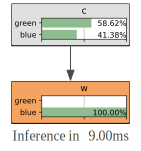

In [2]:
cab = gum.BayesNet('Cab example')

c=cab.add(gum.LabelizedVariable('c','Colour',0).
               addLabel('green').addLabel('blue'))
w=cab.add(gum.LabelizedVariable('w','Witness',0)
              .addLabel('green').addLabel('blue'))
cab.addArc(c,w)

cab.cpt(c).fillWith([0.85,0.15])
cab.cpt(w)[:]=[ [0.8,0.2],[0.2,0.8]]

gnb.showInference(cab,evs={"w":1},targets={c,w})


## Learning unit 2: solution of Exercise 2.1

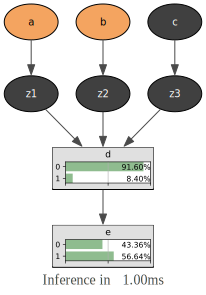

In [3]:
bn=gum.BayesNet('Noisy-AND example')
a=bn.add(gum.LabelizedVariable('a','a',2))
b=bn.add(gum.LabelizedVariable('b','b',2))
c=bn.add(gum.LabelizedVariable('c','c',2))

z1=bn.add(gum.LabelizedVariable('z1','z1',2))
z2=bn.add(gum.LabelizedVariable('z2','z2',2))
z3=bn.add(gum.LabelizedVariable('z3','z3',2))

# This will automatically create an AND node, so you do not need
# to specify its parameters
d=bn.addAND(gum.LabelizedVariable('d','d',2))

e=bn.add(gum.LabelizedVariable('e','e',2))

bn.addArc(a,z1)
bn.addArc(b,z2)
bn.addArc(c,z3)

for link in [(z1,d),(z2,d),(z3,d)]:
    bn.addArc(*link)

bn.addArc(d,e)
    
bn.cpt(a).fillWith([0.6,0.4])
bn.cpt(b).fillWith([0.3,0.7])
bn.cpt(c).fillWith([0.2,0.8])

bn.cpt("z1")[:]=[ [0.1,0.9],[0.3,0.7]]
bn.cpt("z2")[:]=[ [0.2,0.8],[0.6,0.4]]
bn.cpt("z3")[:]=[ [0.7,0.3],[0.7,0.3]]

bn.cpt("e")[:]=[ [0.4,0.6],[0.8,0.2]]

ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showInference(bn,evs={"a":1,"b":1},targets={"d","e"},size="11")



## Learning unit 2: solution of problem 2 

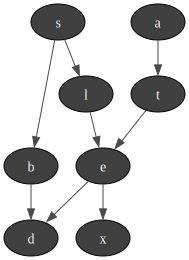

In [4]:
# Exercise 3.3 of BRML

chest = gum.fastBN('a->t->e->x;s->l->e->d;s->b->d',2)
gnb.showBN(chest)

In [5]:
def testIndep(bn,x,y,knowing):
    res="" if bn.isIndependent(x,y,knowing) else " NOT"
    giv="." if len(knowing)==0 else f" given {knowing}."
    print(f"{x} and {y} are{res} independent{giv}")

testIndep(chest,"t","s",["d"])
testIndep(chest,"l","b",["s"])
testIndep(chest,"a","s",["l"])
testIndep(chest,"a","s",["l","d"])

t and s are NOT independent given ['d'].
l and b are independent given ['s'].
a and s are independent given ['l'].
a and s are NOT independent given ['l', 'd'].


## Learning unit 3: example of a Markov network

C:\Users\janba\AppData\Local\Temp\ipykernel_2428\815500730.py:3: DeprecationWarning: 
** pyAgrum.fastMN is deprecated in pyAgrum>1.5.2.
** pyAgrum.fastMRF is called instead.

  mn=gum.fastMN("a--c;c--b")
C:\Users\janba\AppData\Local\Temp\ipykernel_2428\815500730.py:4: DeprecationWarning: "
** pyAgrum.lib.notebook.showMN is obsolete in pyAgrum>1.5.2. Please use showMRF()

  gnb.showMN(mn)


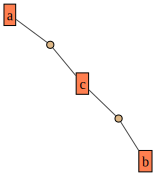

MRF{nodes: 3, edges: 2, domainSize: 8, dim: 8}
nodes       : {0, 1, 2}
node names  : {'c', 'a', 'b'}
edges       : {(0, 1), (1, 2)}
components  : {0: {0, 1, 2}}
factors     : [{0, 1}, {1, 2}]


(pyAgrum.Potential<double>@0x1c4913619c0) 
      ||  c                |
b     ||0        |1        |
------||---------|---------|
0     || 1.0000  | 1.0000  |
1     || 2.0000  | 1.0000  |

In [6]:
# In pyagrum it is actually a factor graph (very similar)

mn=gum.fastMN("a--c;c--b")
gnb.showMN(mn)
print(mn)

print(f"nodes       : {mn.nodes()}")
print(f"node names  : {mn.names()}")
print(f"edges       : {mn.edges()}")
print(f"components  : {mn.connectedComponents()}")
print(f"factors     : {mn.factors()}")
mn.factor({0,1})[:] = [[1,2],[0,1]]
mn.factor({1,2})[:] = [[1,1],[2,1]]
mn.factor({1,2})

In [7]:
iemn=gum.ShaferShenoyMNInference(mn)
iemn.addJointTarget({'a','b','c'})

iemn.makeInference()

# Show the full joint distribution
iemn.jointPosterior({'a','b','c'})

# Notice that 

C:\Users\janba\AppData\Local\Temp\ipykernel_2428\3714635261.py:1: DeprecationWarning: "
** pyAgrum.ShaferShenoyMNInference is deprecated in pyAgrum>1.5.2.
** A pyAgrum.ShaferShenoyMRFInference has been created.

  iemn=gum.ShaferShenoyMNInference(mn)


(pyAgrum.Potential<double>@0x1c4913616c0) 
             ||  c                |
b     |a     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.0909  | 0.0000  |
1     |0     || 0.1818  | 0.0000  |
0     |1     || 0.1818  | 0.0909  |
1     |1     || 0.3636  | 0.0909  |

## Learning unit 4: solution of problem 3


Below you find some examples of causal reasoning in pyAgrum

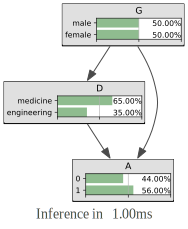

In [8]:
berkeley = gum.BayesNet('Berkeley')

g=berkeley.add(gum.LabelizedVariable('G','Gender',0).
               addLabel('male').addLabel('female'))
d=berkeley.add(gum.LabelizedVariable('D','Department',0)
              .addLabel('medicine').addLabel('engineering'))
a=berkeley.add(gum.LabelizedVariable('A','Admission',2))

berkeley.addArc(g,d)
berkeley.addArc(g,a)
berkeley.addArc(d,a)

berkeley.cpt(g).fillWith([0.5,0.5])

berkeley.cpt("D")[{'G': 'male'}] = [0.5, 0.5]
berkeley.cpt("D")[{'G': 'female'}] = [0.8, 0.2]


berkeley.cpt(d)[:]=[ [0.5,0.5],[0.8,0.2]]


berkeley.cpt("A")[{'G': 'male', 'D': 'medicine'}] = [0.7, 0.3]
berkeley.cpt("A")[{'G': 'male', 'D': 'engineering'}] = [0.1, 0.9]
berkeley.cpt("A")[{'G': 'female', 'D': 'medicine'}] = [0.6, 0.4]
berkeley.cpt("A")[{'G': 'female', 'D': 'engineering'}] = [0, 1]

# Show the marginal distributions
ie=gum.LazyPropagation(berkeley)
ie.makeInference()
gnb.showInference(berkeley,evs={},targets={"G","D","A"},size="11")

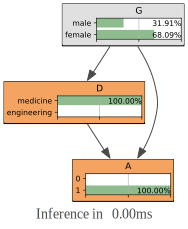

In [21]:
gnb.showInference(berkeley,evs={"A": "1", "D": "medicine"},targets={"G","D","A"},size="11")

### Problem 3a

In [9]:
# Compute p(A | do(D = engineering))
berkeleycausal = csl.CausalModel(berkeley)
cslnb.showCausalImpact(berkeleycausal,"A",doing="D", values={"D":"engineering"})


In [10]:
cslnb.showCausalImpact(berkeleycausal,"A",doing="D", values={"D":"medicine"})

### Problem 3b

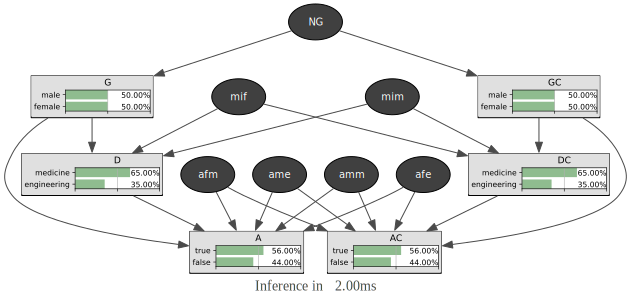

In [11]:
# Twin network of the Berkeley model (manually constructed)
# GC, AC, and DC are meant to represent the 
# variables in the counterfactual world.

bn = gum.BayesNet()
# Counterfactual.net contains the constructed twin network
bn=gum.loadBN("counterfactual.net")
#gnb.showBN(bn,size='9')
gnb.showInference(bn,evs={},targets={"G","D","A","GC","DC","AC"},size="11")

In [15]:
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb

causalBN = csl.CausalModel(bn)
formula, adj, exp = csl.causalImpact(causalBN,"AC",doing="DC",knowing={"D","A"}, values={"D":"medicine", "A":"true","DC":"engineering"})
print(adj)


  AC               |
true     |false    |
---------|---------|
 0.9681  | 0.0319  |



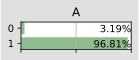

In [14]:
# You can also do this directly in pyAgrum without 
# creating the twin network explicitly

pot=csl.counterfactual(cm = berkeleycausal, 
                       profile = {'A':1, 'D': 'medicine'},
                       whatif={"D"},
                       on={"A"}, 
                       values = {"D" : 'engineering'})
gnb.showProba(pot)

## Learning unit 5: moralisation (problem 4)

In [ ]:
graph = gum.fastBN('a->b->c->d;a->f<-e<-d',2)
gnb.showBN(graph)

In [ ]:
import pyAgrum.lib.mn2graph as m2g

# Create the corresponding (moralised) graph

mn=gum.MarkovNet.fromBN(graph)
gnb.flow.row(graph,
               gnb.getGraph(m2g.MN2UGdot(mn)),
               captions=['a Bayesian network',
                         'the corresponding Markov Network'])


## Example learning unit 6: football

In [ ]:
bn = gum.fastBN("Weather{wet|dry}->Forecast{rainy|cloudy|sunny};Result{wins|loses}<-Weather")

bn.cpt('Weather')[:] = [0.3, 0.7]
bn.cpt('Result')[{"Weather":"wet"}] = [0.6,0.4]
bn.cpt('Result')[{"Weather":"dry"}] = [0.25,0.75]
bn.cpt('Forecast')[:] = [[0.6,0.25,0.15],[0.1,0.4,0.5]]




gnb.showInference(bn,evs={"Forecast":"rainy"},targets={"Weather","Result"},size="11")


In [ ]:
id = gum.fastID("Weather{wet|dry}->Forecast{rainy|cloudy|sunny}->*Bet->$U<-Result{wins|loses}<-Weather")
id

In [ ]:
# Compare two decisions when Forecast = rainy

id.cpt('Weather')[:] = [0.3, 0.7]
id.cpt('Result')[{"Weather":"wet"}] = [0.6,0.4]
id.cpt('Result')[{"Weather":"dry"}] = [0.25,0.75]
id.cpt('Forecast')[:] = [[0.6,0.25,0.15],[0.1,0.4,0.5]]
id.utility('U')[{'Bet': 0, 'Result': 'wins'}] = 20
id.utility('U')[{'Bet': 0, 'Result': 'loses'}] = -5
id.utility('U')[{'Bet': 1, 'Result': 'wins'}] = 40
id.utility('U')[{'Bet': 1, 'Result': 'loses'}] = -20

gnb.flow.row(
    gnb.showInference(id,evs={"Forecast":"rainy","Bet":0},targets={"Forecast","Weather","Result"},size="11"),
    gnb.showInference(id,evs={"Forecast":"rainy","Bet":1},targets={"U","Weather","Result"},size="11"),
    captions=['MEU after not betting',
              'MEU after taking the bet'])


In [ ]:
# Compute optimal decisions for each Forecast

ie=gum.ShaferShenoyLIMIDInference(id)
ie.makeInference()

ie.optimalDecision("Bet")

## Learning unit 7: problem 2

In [ ]:
printer=gum.fastBN("Burning<-Fuse->PJ<-Roller->MP<-Paper->Wrinkled<-Fuse;Drum->Quality<-Toner;Paper->Quality")

gnb.showBN(printer)


In [ ]:
learner=gum.BNLearner('printerdata.csv',printer)

# Maximum likelihood estimation
bn = learner.learnParameters(printer.dag())


In [ ]:
gnb.flow.row(gnb.getInference(bn))

In [ ]:
# Solution Problem 2a
bn.cpt("Wrinkled")

In [ ]:
# Solution problem 2b
learner.useSmoothingPrior()
bn = learner.learnParameters(printer.dag())
bn.cpt("Wrinkled")

In [ ]:
# Solution problem 2c
learner.useSmoothingPrior(weight=2)
bn = learner.learnParameters(printer.dag())
bn.cpt("Wrinkled")

## EM Example

In [ ]:
%%writefile 'dataW.csv'
X,Y,Z
0,0,0
1,?,?
0,1,1
?,1,1

In [ ]:
em_orig=gum.fastBN("X->Y->Z")

# some 'random' probabilities
em_orig.cpt("X").fillWith([0.1,0.9])
em_orig.cpt("Y")[:]=[ [0.1,0.9],[0.3,0.7]]
em_orig.cpt("Z")[:]=[ [0.2,0.8],[0.6,0.4]]


learner = gum.BNLearner('dataW.csv',em_orig, ["?"])
learner.useSmoothingPrior()
learner.useEM(1e-3)

learner.setMaxIter(5)
em_learned = learner.learnParameters(em_orig.dag())
print(f"# iterations : {learner.nbrIterations()}")
gnb.flow.row(gnb.getInference(em_orig),gnb.getInference(em_learned))


In [ ]:
# Now implement this 'by hand'
# This is very inefficient, but it shows how you should compute it by hand!!

import pandas as pd


# Let's first define the BN again, with the same initialisation so
# that we can compare

em_bn=gum.fastBN("X->Y->Z")
# same 'random' probabilities
em_bn.cpt("X").fillWith([0.1,0.9])
em_bn.cpt("Y")[:]=[ [0.1,0.9],[0.3,0.7]]
em_bn.cpt("Z")[:]=[ [0.2,0.8],[0.6,0.4]]


# Read the data
df = pd.read_csv('dataW.csv', sep=',',na_values='?')

print('---- Original data ----')
print(df)
print('-----------------------')

# We need this later
# Weightvar computes the expected count for variable var
def weightvar(data,var):
    return sum(data[data[var]==1]["W"])

# Smoothed_prob computes the expected probability (smoothed)
# for variable var. W indicates the weight.
def smoothed_prob(data,var):
    return (weightvar(data,var)+1) / (sum(data["W"])+2)


# You probably want to learn until convergence, but this is just a toy
max_iter = 5

for i in range(max_iter):
    # First, the E-step
    
    # We will build up expectations for each row in the dataset.
    # If the case is fully observed, the weight (W) is 1
    # Otherwise the weight is the probability of a certain assignment
    # conditioned on the observed data
    df_weighted = pd.DataFrame({
    "X": [],
    "Y": [],
    "Z": [],
    "W": []
    })
    
    # Make a copy so that we can adjust the weights.
    df_copy = df.copy()

    
    for index, row in df_copy.iterrows():
        # Check which variables are observed and which are missing
        nulls = row[row.isnull()].index.tolist()
        observed = row[~row.isnull()].index.tolist()
        


        if nulls != []:
            # This is inefficient, but it is just as an example
            # We just compute the distribution over the missing data
            # given the observed data
            ie=gum.LazyPropagation(em_bn)
            ie.setEvidence(dict(zip(observed, row[observed].astype(int).astype(str))))
            ie.addJointTarget(set(nulls))
            ie.makeInference()
            p = ie.jointPosterior(set(nulls))
      
            # For each possible assignment to the missing data, 
            # add a record to the data weighted by the probability
            for i in p.loopIn():
                vals = [*i.todict().values()]
                row.loc[nulls] = [float(i) for i in vals]
                row["W"] = p.get(i)
                df_weighted = df_weighted.append(row)
        else:
            # If there are no missings, we are sure about this row
            row["W"] = 1.0
            df_weighted = df_weighted.append(row)

    print('---- Expected data ----')
    print(df_weighted)
    print('-----------------------')


    # Now, we maximise, i.e., we compute the parameters taking
    # into account the weight of each record
    
    # (Again, not a nice generic implementation, but hopefully
    # it is easy to follow)

    probx = smoothed_prob(df_weighted, "X")
    em_bn.cpt("X").fillWith([1-probx,probx])

    x0 = df_weighted[df_weighted["X"]==0]
    x1 = df_weighted[df_weighted["X"]==1]

    probygivenx1 = smoothed_prob(x1, "Y")
    probygivenx0 = smoothed_prob(x0, "Y")

    probygivenx1 = smoothed_prob(x1, "Y")
    em_bn.cpt("Y")[:]=[ [1-probygivenx0,probygivenx0],[1-probygivenx1,probygivenx1]]

    y0 = df_weighted[df_weighted["Y"]==0]
    y1 = df_weighted[df_weighted["Y"]==1]

    probzgiveny1 = smoothed_prob(y1, "Z")
    probzgiveny0 = smoothed_prob(y0, "Z")

    em_bn.cpt("Z")[:]=[ [1-probzgiveny0,probzgiveny0],[1-probzgiveny1,probzgiveny1]]

gnb.showInference(em_bn)


In [ ]:
# Compute the log likelihood from data with missings

def loglikelihood(bn,data):
    ie=gum.LazyPropagation(bn)
    ll = 0
    
    for index, row in data.iterrows():
        observed = row[~row.isnull()].index.tolist()
    
        ie.setEvidence(dict(zip(observed, row[observed].astype(int).astype(str))))

        ll += np.log(ie.evidenceProbability())
        
        ie.eraseAllEvidence()
    
    return ll

In [ ]:
# Small check if the resulting model is similar to the pyagrum fit
# Higher is better

print('Initialisation LL:', loglikelihood(em_orig,df))
print('Initialisation pyagrum:',loglikelihood(em_learned,df))
print('Initialisation adhoc:',loglikelihood(em_bn,df))

## Learning unit 8: structure learning

In [ ]:
learner=gum.BNLearner('printerdata.csv',printer)
bnhc=learner.learnBN()
bnhc

In [ ]:
# Adding structural constraints

learner=gum.BNLearner('printerdata.csv',printer)


# Suppose we know that Paper Quality leads to a Paper Jam (PJ)
learner.addMandatoryArc("Paper","PJ")
# There could be a relationship between Drum and Quality, but Quality 
# does not influence Drum
learner.addForbiddenArc("Quality","Drum")
bnconstraints=learner.learnBN()
bnconstraints

In [ ]:
# Compare two models in terms of structure

gnb.showBNDiff(bnhc,bnconstraints)

In [ ]:
# We can also use different learning algorithms. The MIIC algorithm is
# a constraint-based algorithm similar to PC. We can learn the 
# CPDAG as follows

learner.useMIIC()

# An essential graph is the CPDAG
gemiic=learner.learnEssentialGraph()
gemiic

In [ ]:
learner.useGreedyHillClimbing()
bnhc = learner.learnBN()
bnhc

## Learning unit 9: Dynamic Bayesian networks


In [ ]:
#Example 9.1
import pyAgrum.lib.dynamicBN as gdyn

hf = gum.fastBN("h0->ht->bt<-b0")
gdyn.showTimeSlices(hf)


In [ ]:
# unrolling

dbn=gdyn.unroll2TBN(hf,4)
gdyn.showTimeSlices(dbn,size="10")
